In [121]:
from google.colab import files
f=files.upload()

Saving synthetic_food_dataset_imbalanced.csv to synthetic_food_dataset_imbalanced (2).csv


In [122]:
import pandas as pd
food=pd.read_csv('synthetic_food_dataset_imbalanced.csv')
food

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta


In [123]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [124]:
class_distributions=food['Food_Name'].value_counts().reset_index()
class_distributions

,Food_Name,count
0,Pizza,6000
1,Burger,5000
2,Donut,4500
3,Pasta,4000
4,Sushi,3500
5,Ice Cream,3000
6,Steak,2000
7,Apple,1500
8,Banana,1200
9,Salad,1000


In [125]:
import warnings
# Ignore all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

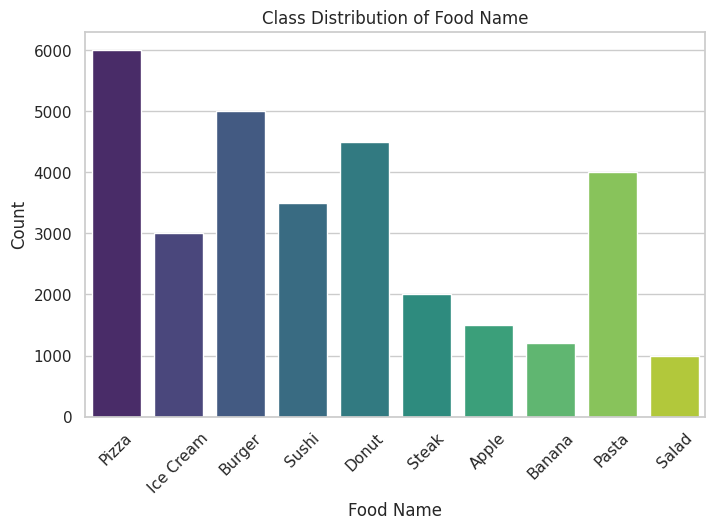

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Food_Name', data=food,palette='viridis')
plt.title('Class Distribution of Food Name')
plt.xticks(rotation=45)
plt.xlabel('Food Name')
plt.ylabel('Count')
plt.show()

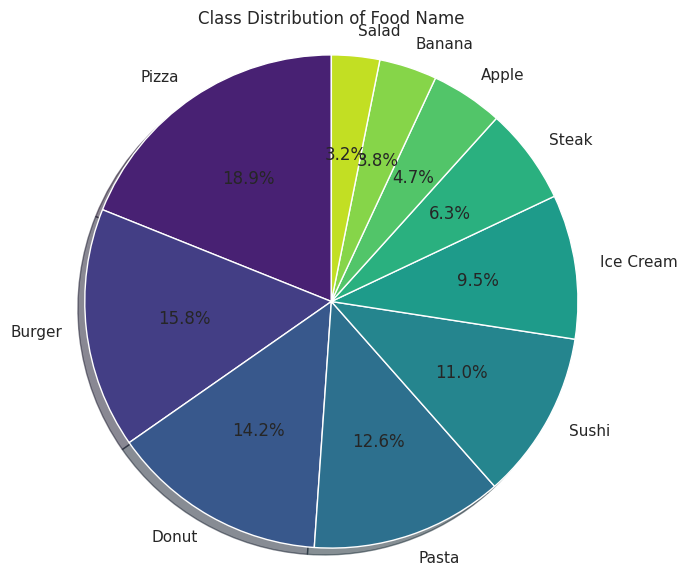

In [127]:
counts = food['Food_Name'].value_counts()
labels = counts.index
sizes = counts.values
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True,
        colors=sns.color_palette('viridis', n_colors=len(labels)))
plt.title('Class Distribution of Food Name')
plt.axis('equal')
plt.show()

In [128]:
print(f"Total data: {food.size}")

Total data: 507200


In [129]:
rows,columns=food.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 31700, Number of columns: 16


In [130]:
class_distributions=food['Food_Name'].value_counts().reset_index()
print(class_distributions)

   Food_Name  count
0      Pizza   6000
1     Burger   5000
2      Donut   4500
3      Pasta   4000
4      Sushi   3500
5  Ice Cream   3000
6      Steak   2000
7      Apple   1500
8     Banana   1200
9      Salad   1000


In [131]:
missing_data = food.isnull().sum()
missingdata = pd.DataFrame({'Missing Count': missing_data})
print(missingdata[missingdata['Missing Count'] > 0])

                Missing Count
Calories                  375
Protein                   375
Fat                       375
Carbs                     375
Sugar                     375
Fiber                     375
Sodium                    375
Cholesterol               375
Glycemic_Index            375
Water_Content             375
Serving_Size              375


In [132]:
missing_percent = round(food.isnull().mean() * 100, 2)
print(missing_percent.sort_values(ascending=False))

Calories              1.18
Protein               1.18
Fat                   1.18
Carbs                 1.18
Sugar                 1.18
Fiber                 1.18
Sodium                1.18
Cholesterol           1.18
Glycemic_Index        1.18
Water_Content         1.18
Serving_Size          1.18
Meal_Type             0.00
Preparation_Method    0.00
Is_Vegan              0.00
Is_Gluten_Free        0.00
Food_Name             0.00
dtype: float64


In [133]:
food_df = food.dropna()
food_df

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta


In [134]:
food_df = food_df.drop_duplicates()
food_df

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta




*   identify outliers at each food type level and show it in the separate table for visulaization
*   now cap/remove outliers for each food type



In [135]:
# Cap outliers in numeric columns using IQR method
import numpy as np
num_cols = food_df.select_dtypes(include=np.number).columns
for col in num_cols:
  Q1 = food_df[col].quantile(0.25)
  Q3 = food_df[col].quantile(0.75)
  IQR = Q3 - Q1
  food_df[col] = food_df[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
print("Outliers capped")

Outliers capped


/tmp/ipython-input-3265828438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df[col] = food_df[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
/tmp/ipython-input-3265828438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df[col] = food_df[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
/tmp/ipython-input-3265828438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [136]:
class_distribution=food_df['Food_Name'].value_counts()
print(class_distribution)

Food_Name
Pizza        5900
Burger       4923
Donut        4454
Pasta        3959
Sushi        3450
Ice Cream    2954
Steak        1981
Apple        1471
Banana       1184
Salad         984
Name: count, dtype: int64


In [137]:
# Encode binary categorical columns
from sklearn.preprocessing import LabelEncoder
for col in ['Is_Vegan', 'Is_Gluten_Free']:
    if col in food_df.columns:
        food_df[col] = LabelEncoder().fit_transform(food_df[col])

/tmp/ipython-input-1729585765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df[col] = LabelEncoder().fit_transform(food_df[col])
/tmp/ipython-input-1729585765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df[col] = LabelEncoder().fit_transform(food_df[col])


In [138]:
# Prepare features and target
X = food_df.drop(['Food_Name'], axis=1, errors='ignore')
y = food_df['Food_Name']

In [139]:
# One hot encoding
X = pd.get_dummies(X,dtype=np.number)

/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [140]:
X

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,...,Is_Vegan,Is_Gluten_Free,Meal_Type_breakfast,Meal_Type_dinner,Meal_Type_lunch,Meal_Type_snack,Preparation_Method_baked,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,...,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,...,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,...,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,...,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,72.391348,...,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
le=LabelEncoder()
y=le.fit_transform(y)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(k=min(20,X_train.shape[1]))
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [145]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    multi_class='multinomial',
    solver='lbfgs'
)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [146]:
# Predict and evaluate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')

In [147]:
print("Logistic Regression Results")
print(f"\nTest Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Results

Test Accuracy: 99.41%
Precision: 99.42%
Recall: 99.41%
F1 Score: 99.41%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       294
           1       0.98      1.00      0.99       237
           2       0.98      0.99      0.99       984
           3       1.00      1.00      1.00       891
           4       0.99      0.99      0.99       591
           5       1.00      1.00      1.00       792
           6       1.00      0.99      0.99      1180
           7       1.00      0.99      1.00       197
           8       0.99      1.00      0.99       396
           9       1.00      1.00      1.00       690

    accuracy                           0.99      6252
   macro avg       0.99      0.99      0.99      6252
weighted avg       0.99      0.99      0.99      6252



In [148]:
class_names = sorted(class_distribution.index.tolist())
import pandas as pd
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix:")
cm_df

Confusion Matrix:


,Apple,Banana,Burger,Donut,Ice Cream,Pasta,Pizza,Salad,Steak,Sushi
Apple,289,5,0,0,0,0,0,0,0,0
Banana,0,237,0,0,0,0,0,0,0,0
Burger,0,0,979,0,1,0,4,0,0,0
Donut,0,0,3,887,1,0,0,0,0,0
Ice Cream,0,0,3,0,585,0,0,0,3,0
Pasta,0,0,1,0,0,791,0,0,0,0
Pizza,0,0,12,0,0,0,1167,0,1,0
Salad,0,1,0,0,0,0,0,196,0,0
Steak,0,0,0,0,1,0,0,0,395,0
Sushi,0,0,1,0,0,0,0,0,0,689


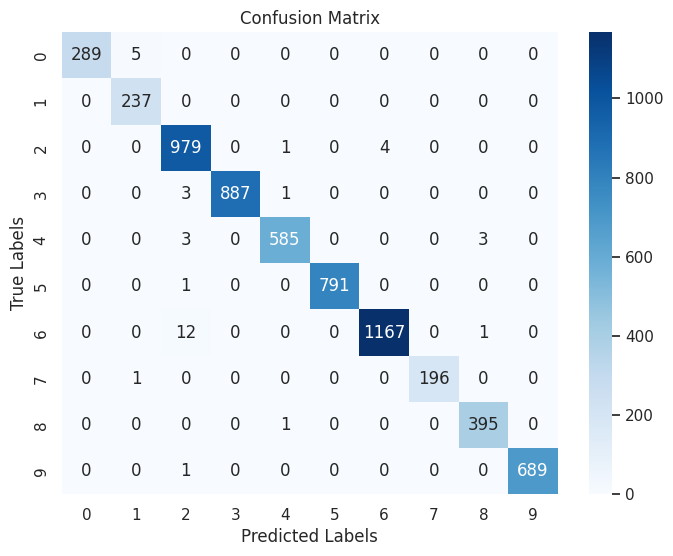

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [150]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [151]:
# Predict and evaluate
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')

In [152]:
print("Decision Tree Classifier Results")
print(f"\nTest Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classifier Results

Test Accuracy: 98.77%
Precision: 98.77%
Recall: 98.77%
F1 Score: 98.77%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       294
           1       0.99      0.98      0.99       237
           2       0.97      0.97      0.97       984
           3       1.00      1.00      1.00       891
           4       0.99      0.99      0.99       591
           5       1.00      1.00      1.00       792
           6       0.98      0.98      0.98      1180
           7       0.99      1.00      1.00       197
           8       0.99      1.00      0.99       396
           9       1.00      1.00      1.00       690

    accuracy                           0.99      6252
   macro avg       0.99      0.99      0.99      6252
weighted avg       0.99      0.99      0.99      6252



In [153]:
class_names = sorted(class_distribution.index.tolist())
import pandas as pd
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix:")
cm_df

Confusion Matrix:


,Apple,Banana,Burger,Donut,Ice Cream,Pasta,Pizza,Salad,Steak,Sushi
Apple,290,3,0,0,0,0,0,1,0,0
Banana,4,233,0,0,0,0,0,0,0,0
Burger,0,0,955,0,2,0,27,0,0,0
Donut,0,0,1,887,2,0,0,0,0,1
Ice Cream,0,0,1,0,585,1,0,0,3,1
Pasta,0,0,0,0,1,791,0,0,0,0
Pizza,0,0,24,0,1,0,1153,0,1,1
Salad,0,0,0,0,0,0,0,197,0,0
Steak,0,0,0,0,1,0,0,0,395,0
Sushi,0,0,1,0,0,0,0,0,0,689


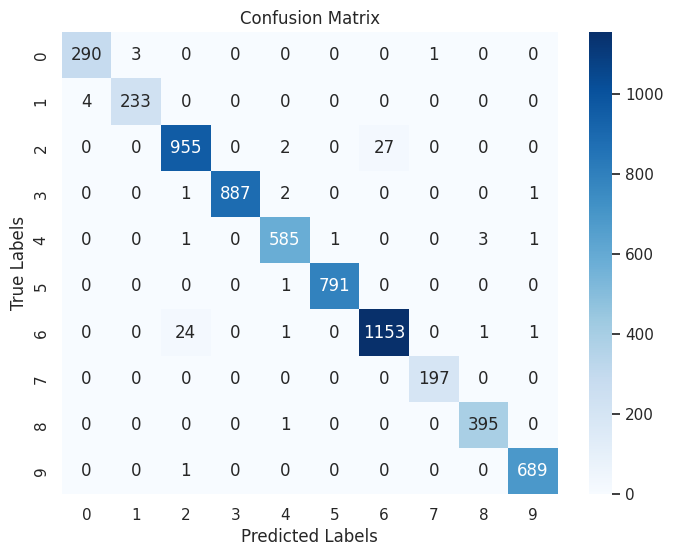

In [154]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [155]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [156]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')

In [157]:
print("Random Forest Classifier Results")
print(f"\nTest Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier Results

Test Accuracy: 99.38%
Precision: 99.38%
Recall: 99.38%
F1 Score: 99.38%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       294
           1       0.99      0.99      0.99       237
           2       0.99      0.99      0.99       984
           3       1.00      1.00      1.00       891
           4       0.99      0.99      0.99       591
           5       1.00      1.00      1.00       792
           6       0.99      0.99      0.99      1180
           7       1.00      0.99      1.00       197
           8       0.99      1.00      0.99       396
           9       1.00      1.00      1.00       690

    accuracy                           0.99      6252
   macro avg       0.99      0.99      0.99      6252
weighted avg       0.99      0.99      0.99      6252



In [158]:
class_names = sorted(class_distribution.index.tolist())
import pandas as pd
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix:")
cm_df

Confusion Matrix:


,Apple,Banana,Burger,Donut,Ice Cream,Pasta,Pizza,Salad,Steak,Sushi
Apple,293,1,0,0,0,0,0,0,0,0
Banana,2,235,0,0,0,0,0,0,0,0
Burger,0,0,974,0,2,0,8,0,0,0
Donut,0,0,0,887,2,1,1,0,0,0
Ice Cream,0,0,0,1,585,0,1,0,3,1
Pasta,0,0,0,0,1,791,0,0,0,0
Pizza,0,0,9,0,1,1,1168,0,1,0
Salad,0,1,0,0,0,0,0,196,0,0
Steak,0,0,0,0,1,0,0,0,395,0
Sushi,0,0,1,0,0,0,0,0,0,689


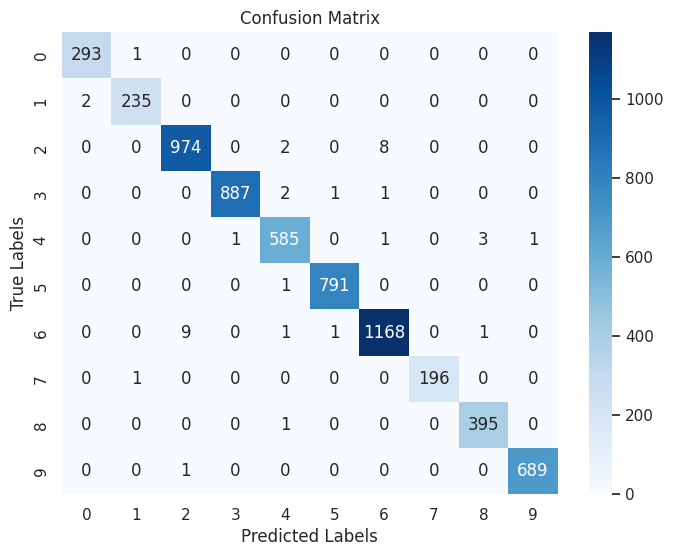

In [159]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [160]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [161]:
# Predict and evaluate
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')

In [162]:
print("KNeighbour Classifier Results")
print(f"\nTest Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNeighbour Classifier Results

Test Accuracy: 99.06%
Precision: 99.06%
Recall: 99.06%
F1 Score: 99.06%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       294
           1       0.97      0.98      0.97       237
           2       0.98      0.98      0.98       984
           3       1.00      1.00      1.00       891
           4       1.00      0.99      0.99       591
           5       1.00      1.00      1.00       792
           6       0.98      0.99      0.99      1180
           7       1.00      0.99      1.00       197
           8       1.00      1.00      1.00       396
           9       1.00      1.00      1.00       690

    accuracy                           0.99      6252
   macro avg       0.99      0.99      0.99      6252
weighted avg       0.99      0.99      0.99      6252



In [163]:
class_names = sorted(class_distribution.index.tolist())
import pandas as pd
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix:")
cm_df

Confusion Matrix:


,Apple,Banana,Burger,Donut,Ice Cream,Pasta,Pizza,Salad,Steak,Sushi
Apple,286,7,1,0,0,0,0,0,0,0
Banana,4,233,0,0,0,0,0,0,0,0
Burger,1,0,962,0,0,0,21,0,0,0
Donut,2,0,1,887,0,1,0,0,0,0
Ice Cream,2,1,3,0,585,0,0,0,0,0
Pasta,0,0,1,0,0,791,0,0,0,0
Pizza,1,0,9,0,0,1,1169,0,0,0
Salad,0,0,1,0,0,0,0,196,0,0
Steak,1,0,0,0,0,0,0,0,395,0
Sushi,0,0,1,0,0,0,0,0,0,689


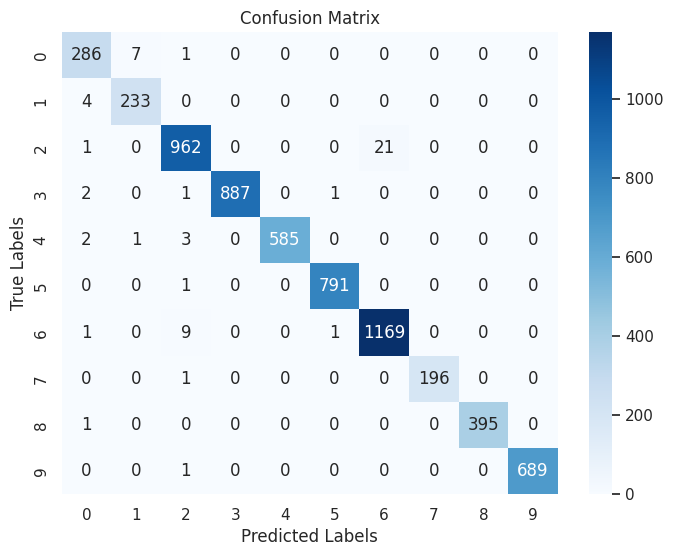

In [164]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [165]:
from sklearn.svm import SVC
model = SVC(class_weight='balanced',
            probability=True,
            random_state=42)
model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [166]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')

In [167]:
print("Support Vector Classifier Results")
print(f"\nTest Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Support Vector Classifier Results

Test Accuracy: 99.39%
Precision: 99.40%
Recall: 99.39%
F1 Score: 99.39%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       294
           1       0.97      1.00      0.98       237
           2       0.99      0.99      0.99       984
           3       1.00      1.00      1.00       891
           4       0.99      0.99      0.99       591
           5       1.00      1.00      1.00       792
           6       1.00      0.99      0.99      1180
           7       1.00      0.99      1.00       197
           8       0.99      1.00      0.99       396
           9       0.99      1.00      0.99       690

    accuracy                           0.99      6252
   macro avg       0.99      0.99      0.99      6252
weighted avg       0.99      0.99      0.99      6252



In [168]:
class_names = sorted(class_distribution.index.tolist())
import pandas as pd
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix:")
cm_df

Confusion Matrix:


,Apple,Banana,Burger,Donut,Ice Cream,Pasta,Pizza,Salad,Steak,Sushi
Apple,288,6,0,0,0,0,0,0,0,0
Banana,1,236,0,0,0,0,0,0,0,0
Burger,0,0,977,0,1,0,5,0,0,1
Donut,0,0,0,887,2,0,0,0,0,2
Ice Cream,0,0,1,0,585,0,0,0,3,2
Pasta,0,0,0,0,1,791,0,0,0,0
Pizza,0,0,8,0,0,0,1169,0,1,2
Salad,0,1,0,0,0,0,0,196,0,0
Steak,0,0,0,0,1,0,0,0,395,0
Sushi,0,0,0,0,0,0,0,0,0,690


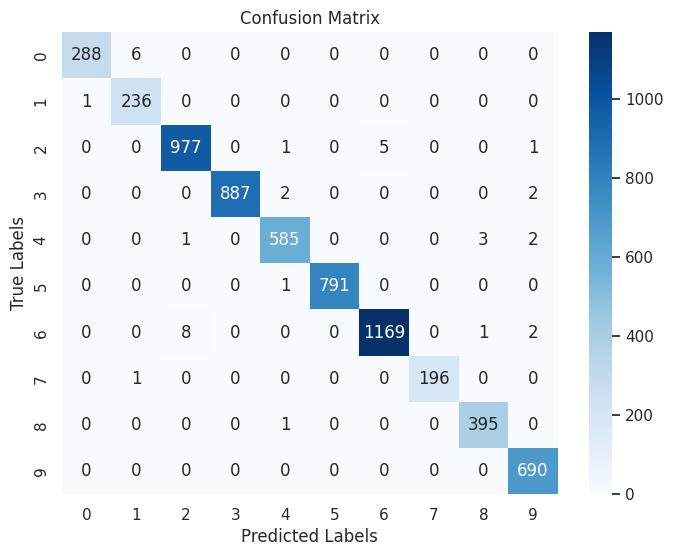

In [169]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [170]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

from xgboost import XGBClassifier
model = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss' # mlogloss for multiclass classification
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [171]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')

In [172]:
print("XGB Classifier Results")
print(f"\nTest Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

XGB Classifier Results

Test Accuracy: 99.36%
Precision: 99.36%
Recall: 99.36%
F1 Score: 99.36%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       294
           1       0.99      0.99      0.99       237
           2       0.99      0.99      0.99       984
           3       1.00      1.00      1.00       891
           4       0.99      0.99      0.99       591
           5       1.00      1.00      1.00       792
           6       0.99      0.99      0.99      1180
           7       1.00      0.99      1.00       197
           8       0.99      1.00      0.99       396
           9       1.00      1.00      1.00       690

    accuracy                           0.99      6252
   macro avg       0.99      0.99      0.99      6252
weighted avg       0.99      0.99      0.99      6252



In [173]:
class_names = sorted(class_distribution.index.tolist())
import pandas as pd
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix:")
cm_df

Confusion Matrix:


,Apple,Banana,Burger,Donut,Ice Cream,Pasta,Pizza,Salad,Steak,Sushi
Apple,293,1,0,0,0,0,0,0,0,0
Banana,3,234,0,0,0,0,0,0,0,0
Burger,0,0,975,0,2,0,7,0,0,0
Donut,0,0,0,887,1,0,2,0,0,1
Ice Cream,0,0,1,0,585,0,3,0,2,0
Pasta,0,0,0,0,1,791,0,0,0,0
Pizza,0,0,10,0,1,0,1167,0,1,1
Salad,0,1,0,0,0,0,0,196,0,0
Steak,0,0,0,0,1,0,0,0,395,0
Sushi,0,0,0,0,0,0,1,0,0,689


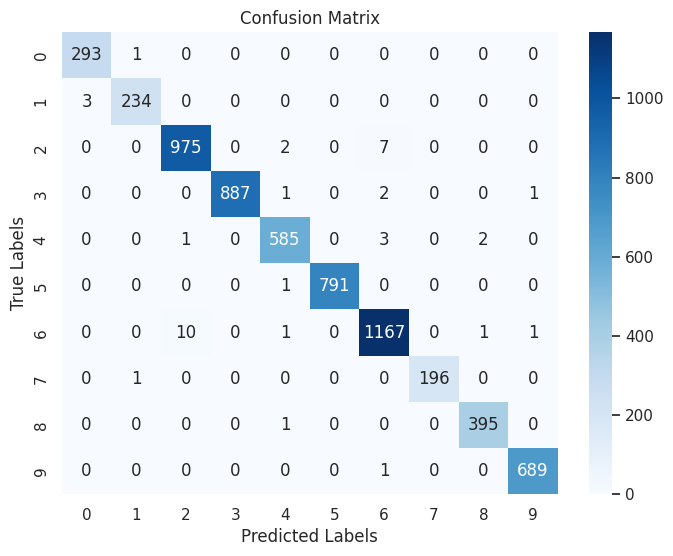

In [174]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [176]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')

In [177]:
print("Gradient Boosting Classifier Results")
print(f"\nTest Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Gradient Boosting Classifier Results

Test Accuracy: 99.39%
Precision: 99.39%
Recall: 99.39%
F1 Score: 99.39%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       294
           1       0.99      0.99      0.99       237
           2       0.99      0.99      0.99       984
           3       1.00      1.00      1.00       891
           4       0.99      0.99      0.99       591
           5       1.00      1.00      1.00       792
           6       0.99      0.99      0.99      1180
           7       1.00      0.99      1.00       197
           8       0.99      1.00      0.99       396
           9       1.00      1.00      1.00       690

    accuracy                           0.99      6252
   macro avg       0.99      0.99      0.99      6252
weighted avg       0.99      0.99      0.99      6252



In [178]:
class_names = sorted(class_distribution.index.tolist())
import pandas as pd
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix:")
cm_df

Confusion Matrix:


,Apple,Banana,Burger,Donut,Ice Cream,Pasta,Pizza,Salad,Steak,Sushi
Apple,293,1,0,0,0,0,0,0,0,0
Banana,2,235,0,0,0,0,0,0,0,0
Burger,0,0,972,0,2,0,10,0,0,0
Donut,0,0,1,887,1,1,0,0,0,1
Ice Cream,0,0,1,0,585,1,1,0,2,1
Pasta,0,0,0,0,1,791,0,0,0,0
Pizza,0,0,6,0,1,0,1171,0,1,1
Salad,0,1,0,0,0,0,0,196,0,0
Steak,0,0,0,0,1,0,0,0,395,0
Sushi,0,0,1,0,0,0,0,0,0,689


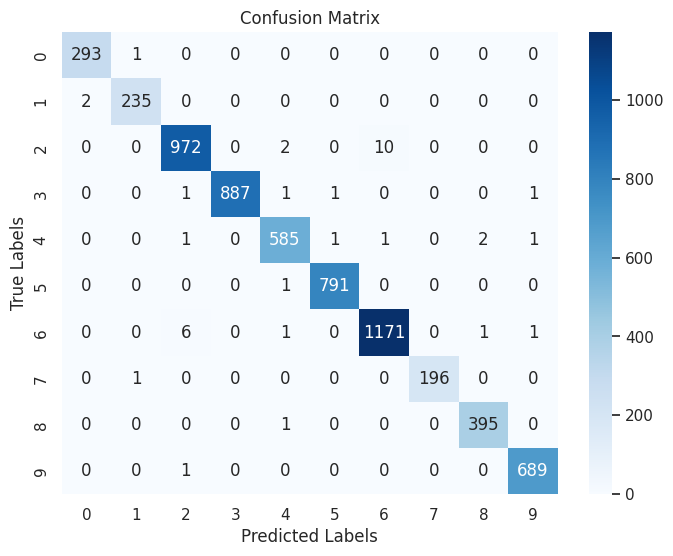

In [179]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()